# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is linear if it is linear in its parameters. This means that the output (dependent variable) is a linear combination of the input variables (independent variables) multiplied by their respective coefficients, plus an intercept. Even if the independent variable is not linear, the coefficients involved in the model are.
2. The coefficient for a dummy variable represents the expected change in the dependent variable when that category is present, relative to the omitted (reference) category. If an intercept is included in the model, the dummy variable's coefficient represents the difference from the reference category. Also, if the intercept is omitted, then each dummy coefficient represents the absolute expected value of the dependent variable for that category (since there's no baseline intercept to compare against).
3. Linear regression can be used for classification by setting a decision threshold. However, it assumes a continuous output and can predict values outside [0, 1], which is problematic for probabilities. Logistic regression is preferred for classification because it models the probability using a sigmoid/logit function, ensuring outputs remain within [0, 1].
4. Signs that a linear model is over-fitting includes high training accuracy but poor test performance (low generalizability), very large coefficients, suggesting the model is too sensitive to small changes, low bias but high variance, meaning it captures too much noise rather than the true relationship, r-squared is very high, but adjusted r-squared is much lower, suggesting irrelevant variables are inflating the fit.
5. Multi-collinearity occurs when independent variables are highly correlated, making it difficult to estimate individual effects. This inflates standard errors and makes coefficient estimates unstable. One way to address this is two-stage least squares, commonly used in instrumental variable regression. The first stage invlves replacing the problematic independent variable (which is collinear with others) with an instrumental variable that is correlated with the problematic predictor but uncorrelated with the error term. Stage two involves using this new variable in the main regression to obtain unbiased estimates.
6. Transformations, interaction terms (multiplying variables together to model joint effects), spline regression (piecewise polynomials for different regions of the data), Generalized Additive Models (GAMs) (allowing flexible, nonlinear relationships while preserving interpretability)
7. Intercept: The predicted value of the dependent variable when all independent variables are zero. If zero is outside the observed range, the intercept may not have a meaningful interpretation.
Slope coefficient: The expected change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all others constant.
Dummy variable coefficient: The expected difference in the dependent variable when the dummy variable is 1, relative to the reference category (assuming an intercept is included).



**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [15]:
#1

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv(r"C:\Users\Brian\.vscode\linearModels\assignment\data\heart_hw.csv")

# Display basic info
df.head()

# a. Proportion of survivors in the control group
control_group = df[df["transplant"] == "control"]
proportion_survive_control = control_group["y"].mean()
print("(a) Proportion of survivors in the control group:", proportion_survive_control)

# b. Computing average treatment effect
treatment_group = df[df["transplant"] == 'treatment']
proportion_survive_treatment = treatment_group["y"].mean()
ate = proportion_survive_treatment - proportion_survive_control
print("(b) Average Treatment Effect (ATE):", ate)

(a) Proportion of survivors in the control group: 0.11764705882352941
(b) Average Treatment Effect (ATE): 0.23017902813299232


In [27]:
#2

#load in data again
df = pd.read_csv(r"C:\Users\Brian\.vscode\linearModels\assignment\data\heart_hw.csv")

#regress y on transplant
df['transplant']= df['transplant'].map({'control': 0, 'treatment': 1})
X = sm.add_constant(df["transplant"])
y = df["y"]
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Tue, 25 Mar 2025   Prob (F-statistic):             0.0133
Time:                        13:49:08   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1176      0.075      1.574      0.1

The intercept represents the survival probability of the control group while the coefficient on transplant represents the difference in survival probability between the transplant and control groups (matching the ATE from 1b.)

In [28]:
#3

#regress y on transplant and age
X = sm.add_constant(df[["transplant", "age"]])
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           0.000357
Time:                        13:53:03   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7020      0.196      3.583      0.0

The intercept (const) now represents the expected survival probability for a patient of age 0 who did not receive a transplant. The coefficient on age captures impact of age on survival and the coeff on transplant adjusts for age and represents the effect of receiving a transplant.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     6.210
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           0.000861
Time:                        15:10:19   Log-Likelihood:                -37.637
No. Observations:                  72   AIC:                             83.27
Df Residuals:                      68   BIC:                             92.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.485      0.046      0.9

C:\Users\Brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


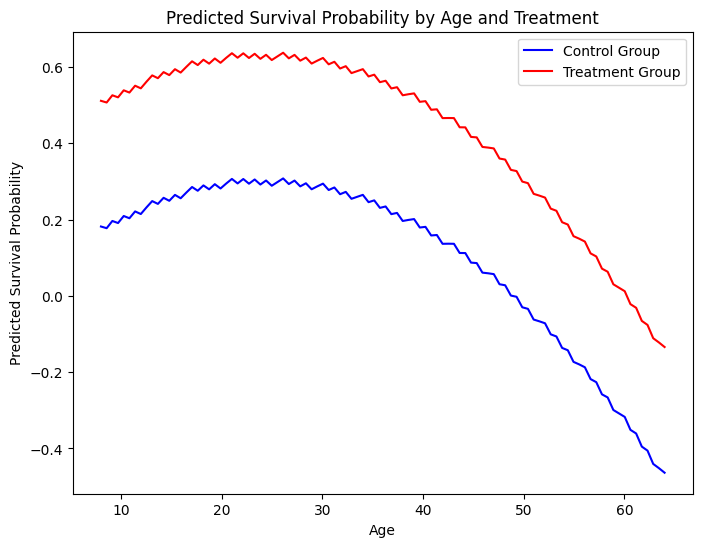

In [58]:
#4

# train on 70% test on 30% split
train, test = train_test_split(df, test_size=0.3, random_state=123)

# Create polynomial terms for age
poly = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly.fit_transform(train[["age"]])  # Second-degree polynomial for age

# Convert to DataFrame
age_poly_df = pd.DataFrame(age_poly, columns=["age", "age^2"], index=train.index)  # Keep index
age_poly_df["age^2"] = age_poly_df["age^2"].astype(int)
age_poly_df = age_poly_df.drop(columns=["age"])  # Drop redundant age column

# Merge without duplicate column conflicts
train = train.merge(age_poly_df, left_index=True, right_index=True)

# Repeat for test data
age_poly_test = poly.transform(test[["age"]])
age_poly_df_test = pd.DataFrame(age_poly_test, columns=["age", "age^2"], index=test.index)
age_poly_df_test["age^2"] = age_poly_df_test["age^2"].astype(int)
age_poly_df_test = age_poly_df_test.drop(columns=["age"])

test = test.merge(age_poly_df_test, left_index=True, right_index=True)

# Fit the model with interaction
X_train = sm.add_constant(train[["transplant", "age", "age^2"]])  # Add polynomial terms
y_train = train["y"]

model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

# Predict on Test Data
X_test = sm.add_constant(test[["transplant", "age", "age^2"]])
test["predicted_survival"] = model3.predict(X_test)

# Create age range for prediction
age_range = np.linspace(df["age"].min(), df["age"].max(), 100)
age_poly_range = poly.transform(age_range.reshape(-1, 1))
age_df = pd.DataFrame(age_poly_range, columns=["age", "age^2"])

# Add constant column manually before prediction
X_pred_control = pd.DataFrame({
    "const": 1,  # Add intercept
    "transplant": 0,
    "age": age_df["age"].astype(int),
    "age^2": age_df["age^2"].astype(int)
})

X_pred_treatment = pd.DataFrame({
    "const": 1,  # Add intercept
    "transplant": 1,
    "age": age_df["age"].astype(int),
    "age^2": age_df["age^2"].astype(int)
})

# Ensure alignment with model coefficients
print(X_pred_treatment.shape, model3.params.shape)  # Should both have 4 columns

# Predict values
pred_control = model3.predict(X_pred_control)
pred_treatment = model3.predict(X_pred_treatment)



# Plot results
plt.figure(figsize=(8, 6))
plt.plot(age_range, pred_control, label="Control Group", color="blue")
plt.plot(age_range, pred_treatment, label="Treatment Group", color="red")
plt.xlabel("Age")
plt.ylabel("Predicted Survival Probability")
plt.title("Predicted Survival Probability by Age and Treatment")
plt.legend()
plt.show()



The R-squared value of 0.215 suggests a week fit. Transplant status is the only significant predictor, but I also think that I messed something up here. If this were correct, it would mean other factors likely explain y better than the included variables. It is interesting to see that the curves are relatively the same for both Control Group and Treatment Group.

5. If such a model were used for selecting transplant recipients, the following concerns must be addressed. First, the model may be biased and unfair and disadvatage older patients or those with certain pre-existing conditions. Second, the algorithm should be interpretable so that doctors and patients understand why certain individuals are prioritized. Furthermore, the model may overfit to past data, making inaccurate predictions for new cases. Finally, even if a model predicts survival well, medical professionals should make the final decision rather than relying purely on an algorithm.

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

Path to dataset files: C:\Users\Brian\.cache\kagglehub\datasets\jvanark\nvidia-daily-stock-price-data\versions\2


,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


Missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


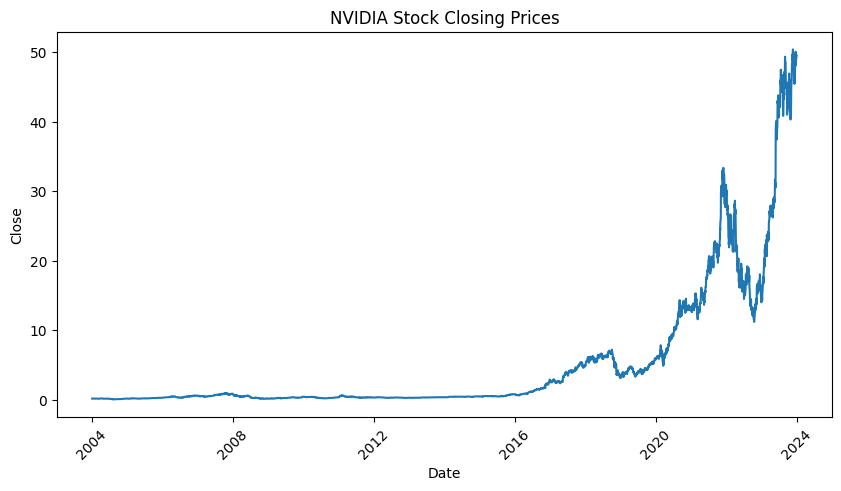

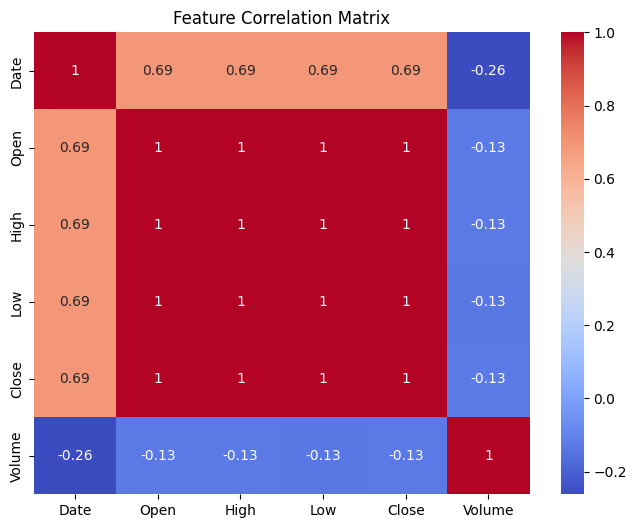

Linear Regression SSE: 11.85
Random Forest SSE: 31.26
Gradient Boosting SSE: 37.89


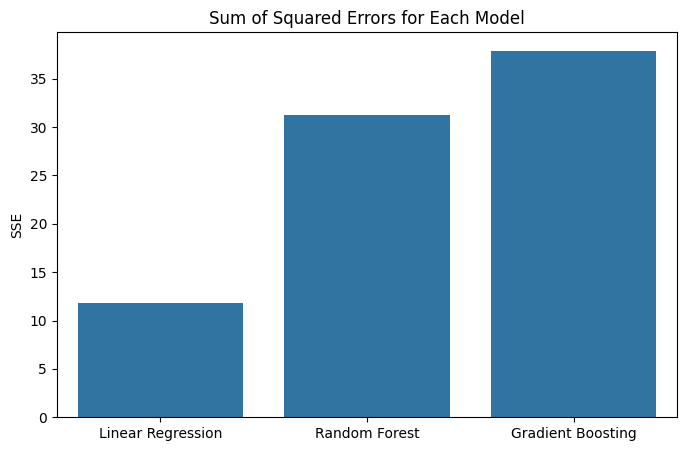

Best model: Linear Regression with SSE: 11.85


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jvanark/nvidia-daily-stock-price-data")

print("Path to dataset files:", path)

df = pd.read_csv(r"C:\Users\Brian\.cache\kagglehub\datasets\jvanark\nvidia-daily-stock-price-data\versions\2\nvidia_stock_prices.csv", parse_dates=['Date'])
# Display first few rows
display(df.head())

# Data Cleaning
print("Missing values:")
print(df.isnull().sum())
df.dropna(inplace=True)

# Exploratory Data Analysis
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Close')
plt.xticks(rotation=45)
plt.title("NVIDIA Stock Closing Prices")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Define Target and Predictors
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)
    results[name] = sse
    print(f"{name} SSE: {sse:.2f}")

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Sum of Squared Errors for Each Model")
plt.ylabel("SSE")
plt.show()

# Best model
best_model = min(results, key=results.get)
print(f"Best model: {best_model} with SSE: {results[best_model]:.2f}")